<a href="https://colab.research.google.com/github/enVives/TFG/blob/main/AnalisiDocDistancies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import os
import cv2
import ast

from glob import glob
import json
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import drive


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


import ast
from collections import Counter


DRIVE_PATH = "/content/drive/MyDrive/Features/Dist/"
EXECUCIO = 1

drive.mount('/content/drive')
metadates_cos = pd.read_csv('/content/drive/MyDrive/Features/Dist/'+str(1)+"/distances.txt", sep=";")
metadates_l2 = pd.read_csv('/content/drive/MyDrive/Features/Dist/'+str(2)+"/distances.txt", sep=";")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [160]:
def process_and_get_mode(row):
    real_list = ast.literal_eval(row.replace(" ", ","))  # Convertir string a lista
    counter = Counter(real_list)
    return counter.most_common(1)[0][0]  # Devolver la moda

In [161]:
def plot_confusion_matrix(y_true, y_pred, title):
    # Crear la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    # Visualizar con Seaborn
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_true), yticklabels=set(y_true))
    plt.xlabel("Etiqueta Majoritaria Dists")
    plt.ylabel("Test Image Label")
    plt.title(title)
    plt.show()

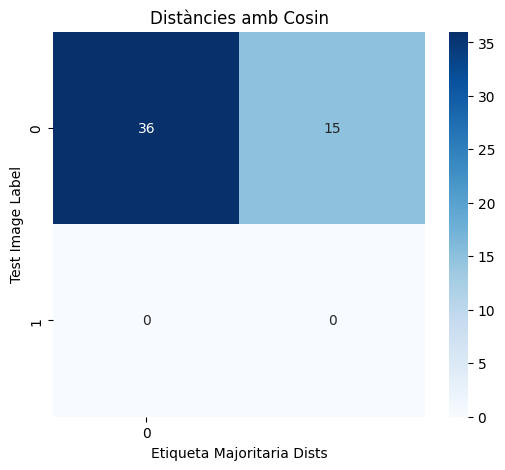

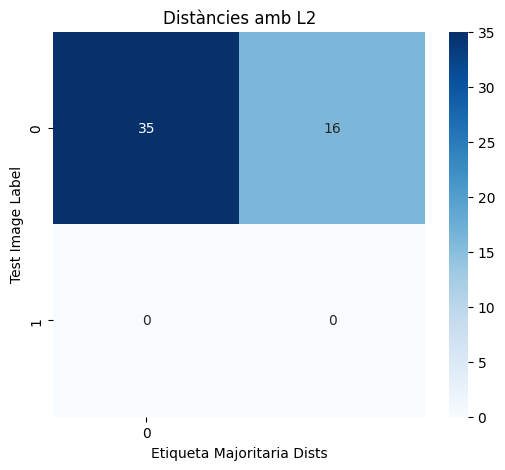

In [162]:
y_cosin = metadates_cos['test_img_label']
y_cosin = y_cosin.drop(index=2)
x_cosin = metadates_cos['top_images_labels']
x_cosin = x_cosin.drop(index=2)

y_l2 = metadates_l2['test_img_label']
x_l2 = metadates_l2['top_images_labels']

x_cosin = x_cosin.apply(process_and_get_mode)
x_l2 = x_l2.apply(process_and_get_mode)

mal_calculades_y_cosin = y_cosin.loc[x_cosin != y_cosin]
mal_calculades_x_cosin = x_cosin.loc[x_cosin != y_cosin]

y_cosin.loc[x_cosin == y_cosin] = '0'
x_cosin.loc[y_cosin == '0'] = '0'

y_cosin.loc[y_cosin != '0'] = '0'
x_cosin.loc[x_cosin != '0'] = '1'

mal_calculades_y_l2 = y_l2.loc[x_l2 != y_l2]
mal_calculades_x_l2 = x_l2.loc[x_l2 != y_l2]

y_l2.loc[x_l2 == y_l2] = '0'
x_l2.loc[y_l2 == '0'] = '0'

y_l2.loc[y_l2 != '0'] = '0'
x_l2.loc[x_l2 != '0'] = '1'

plot_confusion_matrix(y_cosin, x_cosin, "Distàncies amb Cosin")
plot_confusion_matrix(y_l2, x_l2, "Distàncies amb L2")